In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

In [2]:
data = pd.read_csv("files/CleanBusCardType.csv", thousands = ",") # thousands = "," change the format of data
data.head()

,Date,MonthNumber,Adult,Child/Youth,Concession,Employee,Free Travel,School Student,Senior/Pensioner,On Demand,CTP,Day Pass Child/Youth w/o SAF,Day Pass without SAF,Monthly passengers
0,16-Jul,1,390433.0,62800.0,136064.0,0.0,1149.0,138642.0,206110.0,0.0,0.0,0,0,935198.0
1,16-Aug,2,386386.0,67010.0,73590.0,0.0,1281.0,296261.0,224668.0,0.0,0.0,0,0,1049196.0
2,16-Sep,3,370068.0,70022.0,61676.0,0.0,1320.0,203827.0,218598.0,0.0,0.0,0,0,925511.0
3,16-Oct,4,381402.0,78951.0,60635.0,0.0,1410.0,197558.0,227088.0,0.0,0.0,0,0,947044.0
4,16-Nov,5,405245.0,76328.0,57858.0,0.0,1462.0,255994.0,236965.0,0.0,0.0,0,0,1033852.0


In [3]:
## converted the Date column to a Data type which can be used for training and testing
data['Date'] = pd.to_datetime( data['Date'], 
 format = '%y-%b',errors = 'raise')
data.Date.head()

0   2016-07-01
1   2016-08-01
2   2016-09-01
3   2016-10-01
4   2016-11-01
Name: Date, dtype: datetime64[ns]

In [4]:
data

,Date,MonthNumber,Adult,Child/Youth,Concession,Employee,Free Travel,School Student,Senior/Pensioner,On Demand,CTP,Day Pass Child/Youth w/o SAF,Day Pass without SAF,Monthly passengers
0,2016-07-01,1,390433.0,62800.0,136064.0,0.0,1149.0,138642.0,206110.0,0.0,0.0,0,0,935198.0
1,2016-08-01,2,386386.0,67010.0,73590.0,0.0,1281.0,296261.0,224668.0,0.0,0.0,0,0,1049196.0
2,2016-09-01,3,370068.0,70022.0,61676.0,0.0,1320.0,203827.0,218598.0,0.0,0.0,0,0,925511.0
3,2016-10-01,4,381402.0,78951.0,60635.0,0.0,1410.0,197558.0,227088.0,0.0,0.0,0,0,947044.0
4,2016-11-01,5,405245.0,76328.0,57858.0,0.0,1462.0,255994.0,236965.0,0.0,0.0,0,0,1033852.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2021-04-01,58,271849.0,52658.0,36117.0,1944.0,1353.0,69598.0,176368.0,8887.0,101192.0,1,99,720066.0
58,2021-05-01,59,289229.0,42457.0,42044.0,1967.0,1329.0,132272.0,183225.0,10133.0,106754.0,0,147,809557.0
59,2021-06-01,60,259924.0,34715.0,32919.0,1314.0,1081.0,102099.0,163825.0,9366.0,97027.0,0,95,702365.0
60,2021-07-01,61,127354.0,11205.0,10461.0,513.0,488.0,1276.0,75935.0,0.0,48652.0,0,79,275963.0


In [5]:
data.shape

(62, 14)

<AxesSubplot:xlabel='Date', ylabel='million'>

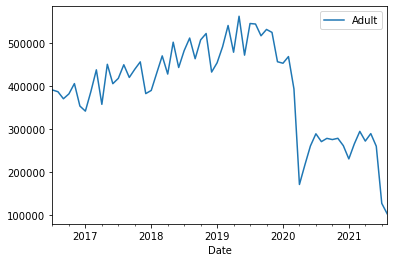

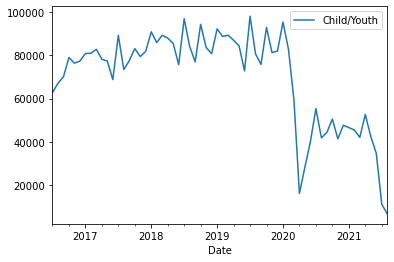

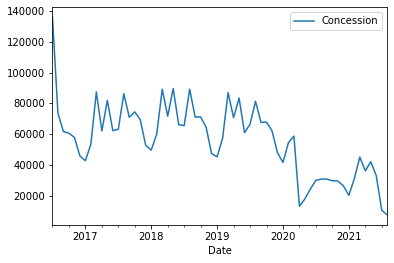

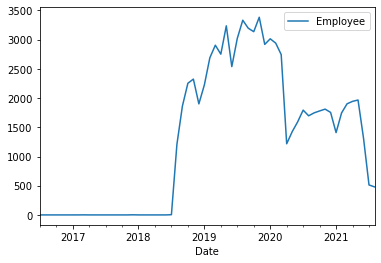

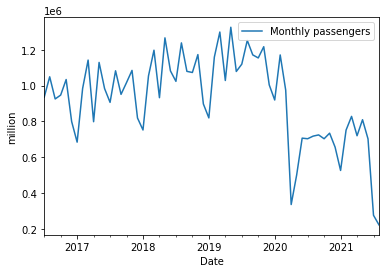

In [6]:
data.plot('Date','Adult')
data.plot(x='Date',y='Child/Youth')
data.plot(x='Date',y='Concession')
data.plot(x='Date',y='Employee')
data.plot(ylabel='million',x='Date',y='Monthly passengers')

<AxesSubplot:xlabel='MonthNumber'>

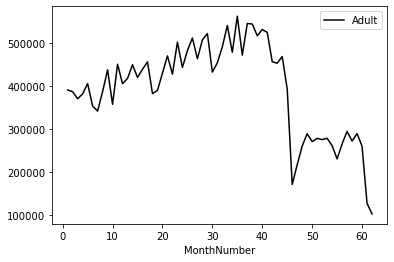

In [7]:
data.plot.line(x='MonthNumber',y='Adult', c='Black')

#### The lock down  in 2020 happened at March, which means that from July 2016 till March 2020 there are 45 months in between, and there are 17 months after the lock down (until July 2021).

In [8]:
# Split the data into two part, train(the month that before COVID-19 happen) and test(what are we going to predict, the month after COVID-19 happen)
train, test = train_test_split(data, test_size=0.27, random_state=142)
print(train.shape)
print(test.shape)

(45, 14)
(17, 14)


data: bus passengers from July 2016 - Aug 2020

before COVID: July 2016 - March 2020 (0-45) 45 months
After lock down: April 2020 - August 2021 (45-62) 17 months

prediction:
    what the data will be like if there will no lock down for the after lock down period

In [9]:
x = data['Date'][:45]
print(x.head())

0   2016-07-01
1   2016-08-01
2   2016-09-01
3   2016-10-01
4   2016-11-01
Name: Date, dtype: datetime64[ns]


In [10]:
reg = linear_model.LinearRegression()
x = data[['MonthNumber']]
y = data['Adult']
reg.fit(x[:45], y[:45])
print("y = x *", reg.coef_, "+", reg.intercept_)


y = x * [3121.70065876] + 377651.1737373737


In [11]:
predicted = reg.predict(x[45:62])

In [12]:
print(len(predicted))

17


In [13]:
mse = ((np.array(y[45:62])-predicted)**2).sum()/len(y[45:62])
r2 = r2_score(y[45:62], predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 95294531840.65356
R Squared: -29.90515870342765


In [14]:
print(predicted)

[521249.4040404  524371.10469917 527492.80535793 530614.50601669
 533736.20667545 536857.90733421 539979.60799297 543101.30865173
 546223.0093105  549344.70996926 552466.41062802 555588.11128678
 558709.81194554 561831.5126043  564953.21326307 568074.91392183
 571196.61458059]


In [21]:
predicted_Adult = np.array([predicted])
predicted_Adult

array([[521249.4040404 , 524371.10469917, 527492.80535793,
        530614.50601669, 533736.20667545, 536857.90733421,
        539979.60799297, 543101.30865173, 546223.0093105 ,
        549344.70996926, 552466.41062802, 555588.11128678,
        558709.81194554, 561831.5126043 , 564953.21326307,
        568074.91392183, 571196.61458059]])

In [28]:
actual_Adult = data['Adult'][45:]
actual_Adult

45    171160.0
46    216827.0
47    260477.0
48    288798.0
49    270591.0
50    278146.0
51    275385.0
52    278318.0
53    261170.0
54    230528.0
55    265311.0
56    294367.0
57    271849.0
58    289229.0
59    259924.0
60    127354.0
61    102883.0
Name: Adult, dtype: float64

In [29]:
Adult = pd.DataFrame(predicted_Adult.T)
Adult.columns =['Predicted Adult(No COVID)']
Adult["Have COVID"] = actual_Adult
Adult

,Predicted Adult(No COVID),Have COVID
0,521249.404040,NaN
1,524371.104699,NaN
2,527492.805358,NaN
3,530614.506017,NaN
4,533736.206675,NaN
5,536857.907334,NaN
6,539979.607993,NaN
7,543101.308652,NaN
8,546223.009310,NaN
9,549344.709969,NaN
